Regression learning to predict house price

# 1. First processing data

In [11]:
import pandas as pd

path = "/content/drive/MyDrive/Colab Notebooks/House_Sales_Prediction/"

df = pd.read_csv(path+"kc_house_data.csv")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [13]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


| Making data into correct types    | Dropping columns |
|-----------------------------------|------------------|
| `price` from **float** to **int** | `id` - because it not change price |
| `floor` from **float** to **int** | `zipcode` - doesn't matter |

## 1.1 Pre-processing

In [14]:
df["date"] = pd.to_datetime(df["date"].str.strip(), format = "%Y/%m/%d")

In [15]:
df = df.drop(columns=["id", "zipcode"], axis=1)

In [16]:
df["price"] = df["price"].astype(int)
df["floors"] = df["floors"].astype(int)

In [17]:
df["Year"] = df["date"].dt.year
df["Month"] = df["date"].dt.year
df["Day"] = df["date"].dt.year

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  int64         
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  int64         
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  lat            2161

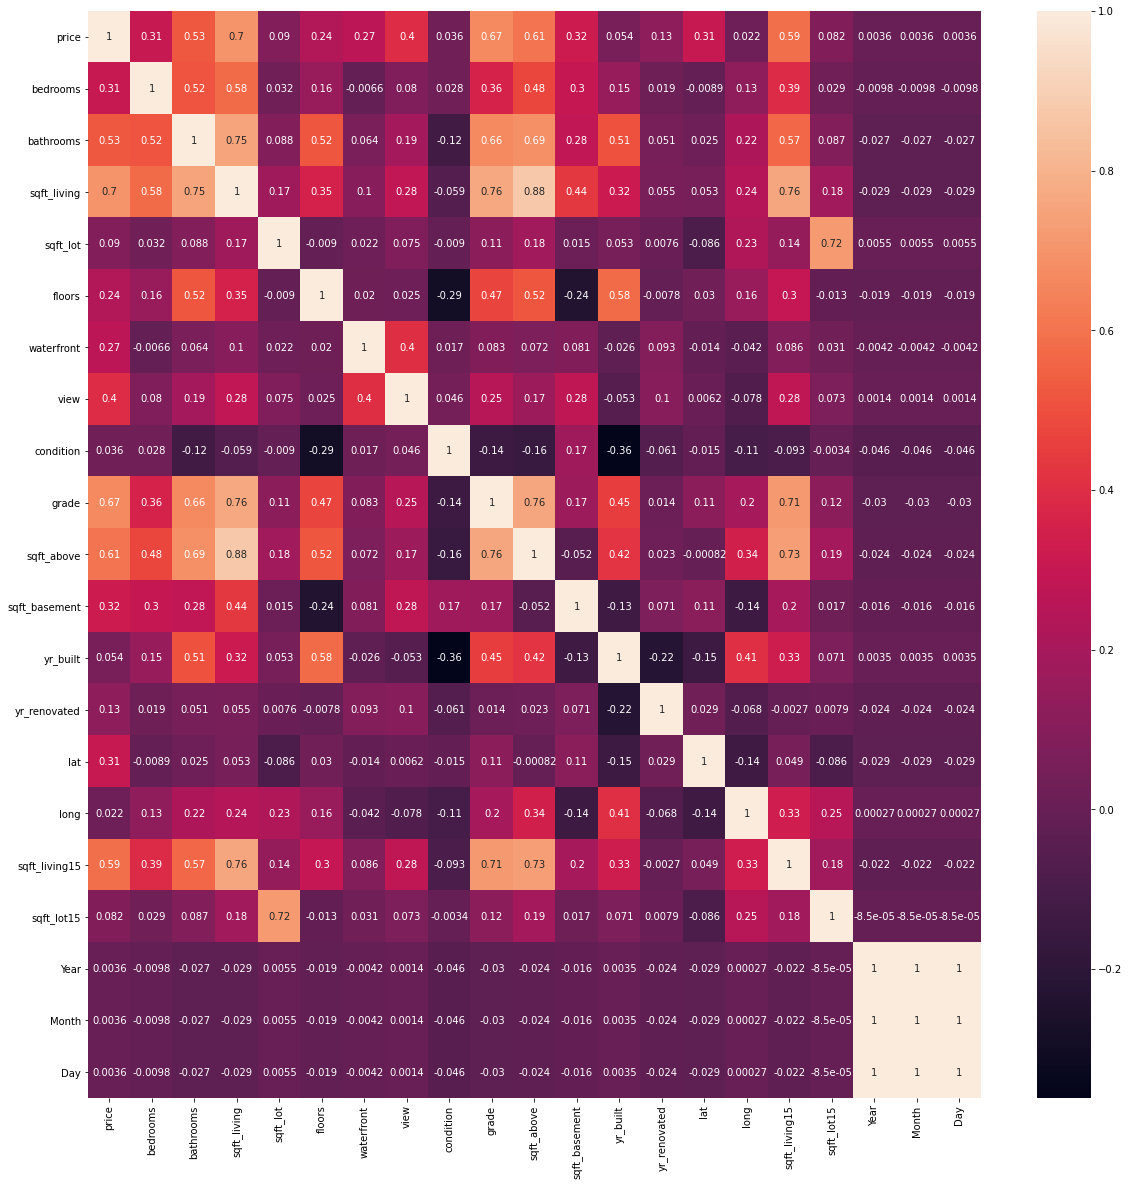

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 20))

sns.heatmap(df.corr(), annot = True)

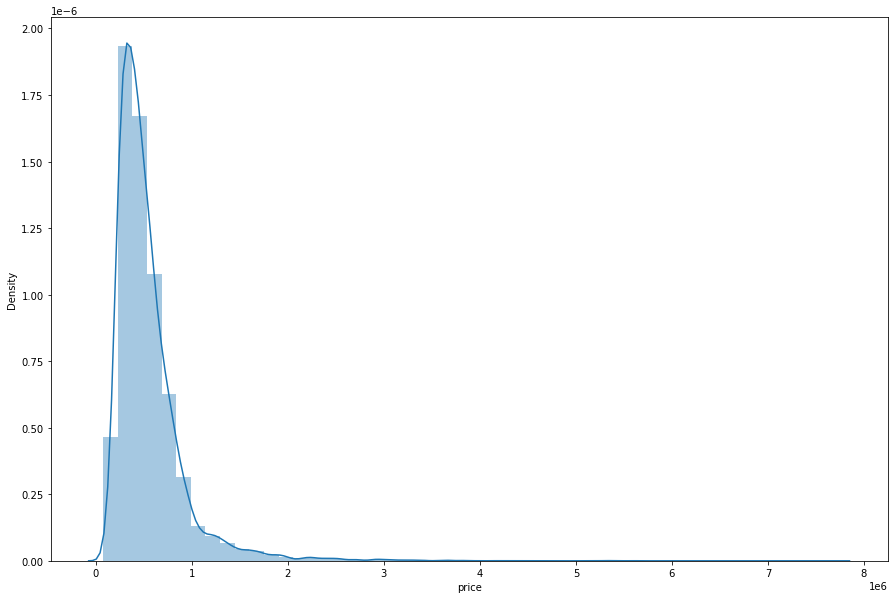

In [28]:
plt.figure(figsize = (15, 10))

sns.distplot(df.price)

date is useless so we drop it

In [20]:
df = df.drop(columns=["date", "Year", "Month", "Day"], axis=1)

# 2. Learning models

In [22]:
x = df.drop(columns='price', axis=1)
y = df['price'].values

lack of data for regression

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True) 

#### **GradientBoosting**

In [24]:
grb = GradientBoostingRegressor(n_estimators=500).fit(x_train, y_train)
grb.score(x_test, y_test)

0.8793073681538958

##### Score = 87.93%

#### LinearRegressor

In [29]:
lr = LinearRegression().fit(x_train, y_train)
lr.score(x_test, y_test)

0.7260954288896353

##### Score = 72.61%

#### DecisionTree

In [41]:
dt = DecisionTreeRegressor(max_depth=10).fit(x_train, y_train)
dt.score(x_test, y_test)

0.8004476390597646

##### Score = 80.04%

# Results